## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

```sql
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
```

## Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
data = pd.read_csv("QueryResults.csv",names=["DATE","TAG","POSTS"],header=0)
data.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164


**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [3]:
data.tail()

,DATE,TAG,POSTS
2547,2023-11-01 00:00:00,php,1838
2548,2023-11-01 00:00:00,python,10185
2549,2023-11-01 00:00:00,r,2174
2550,2023-11-01 00:00:00,ruby,170
2551,2023-11-01 00:00:00,swift,962


In [4]:
data.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164


**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [5]:
data.shape

(2552, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2552 entries, 0 to 2551
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    2552 non-null   object
 1   TAG     2552 non-null   object
 2   POSTS   2552 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 59.9+ KB


In [7]:
data.count()

DATE     2552
TAG      2552
POSTS    2552
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [8]:
data.groupby(by="TAG").sum().sort_values(by="POSTS",ascending=False)

,POSTS
TAG,
javascript,2517995
python,2174057
java,1910924
c#,1607310
php,1462340
c++,802076
r,500552
c,401239
swift,331350


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [9]:
data.groupby(by="TAG").count().sort_values(by="DATE")

,DATE,POSTS
TAG,,
go,169,169
swift,176,176
r,182,182
assembly,184,184
c,184,184
c++,184,184
delphi,184,184
java,184,184
javascript,184,184


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [10]:
data['DATE'][1]

'2008-08-01 00:00:00'

In [11]:
type(data['DATE'][1])

str

In [12]:
pd.to_datetime(data['DATE'][1])

Timestamp('2008-08-01 00:00:00')

In [13]:
data['DATE'] = pd.to_datetime(data['DATE'])

data.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164


## Data Manipulation



In [14]:
# Pivoting the data frame
reshaped_df = data.pivot(
                        index="DATE",
                        columns="TAG",
                        values="POSTS"
                        )
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1639.0,755.0,104.0,NaN,1129.0,634.0,130.0,475.0,538.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1988.0,807.0,112.0,NaN,1149.0,722.0,128.0,609.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1731.0,734.0,141.0,NaN,954.0,580.0,97.0,499.0,449.0,1.0,157.0,NaN


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [15]:
reshaped_df.shape

(185, 14)

In [16]:
reshaped_df.columns.to_list()

['assembly',
 'c',
 'c#',
 'c++',
 'delphi',
 'go',
 'java',
 'javascript',
 'perl',
 'php',
 'python',
 'r',
 'ruby',
 'swift']

In [17]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1639.0,755.0,104.0,NaN,1129.0,634.0,130.0,475.0,538.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1988.0,807.0,112.0,NaN,1149.0,722.0,128.0,609.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1731.0,734.0,141.0,NaN,954.0,580.0,97.0,499.0,449.0,1.0,157.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?

In [18]:
reshaped_df.count().sort_values(ascending=False)

TAG
c#            185
assembly      184
c             184
c++           184
delphi        184
java          184
javascript    184
perl          184
php           184
python        184
ruby          184
r             182
swift         176
go            169
dtype: int64

In [19]:
reshaped_df.fillna(0,inplace=True)

reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,505.0,164.0,14.0,0.0,222.0,163.0,28.0,158.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1639.0,755.0,104.0,0.0,1129.0,634.0,130.0,475.0,538.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1988.0,807.0,112.0,0.0,1149.0,722.0,128.0,609.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1731.0,734.0,141.0,0.0,954.0,580.0,97.0,499.0,449.0,1.0,157.0,0.0


In [20]:
reshaped_df.isnull().sum().sort_values(ascending=False)

TAG
assembly      0
c             0
c#            0
c++           0
delphi        0
go            0
java          0
javascript    0
perl          0
php           0
python        0
r             0
ruby          0
swift         0
dtype: int64

In [21]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

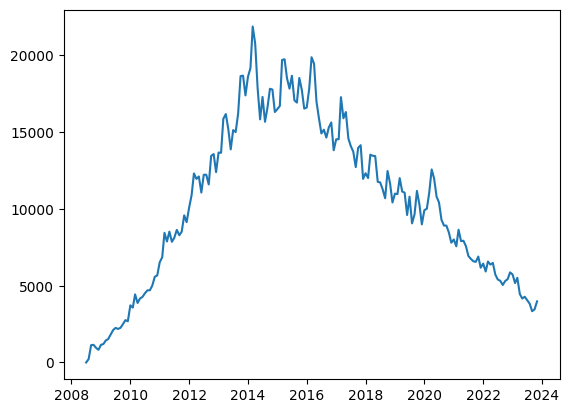

In [22]:
plt.plot(
    reshaped_df.index,
    reshaped_df['java']
)

### Styling the Chart
Let's look at a couple of methods that will help us style our chart:

* `.figure()` - allows us to resize our chart

* `.xticks()` - configures our x-axis

* `.yticks()` - configures our y-axis

* `.xlabel()` - add text to the x-axis

* `.ylabel()` - add text to the y-axis

* `.ylim()` - allows us to set a lower and upper bound

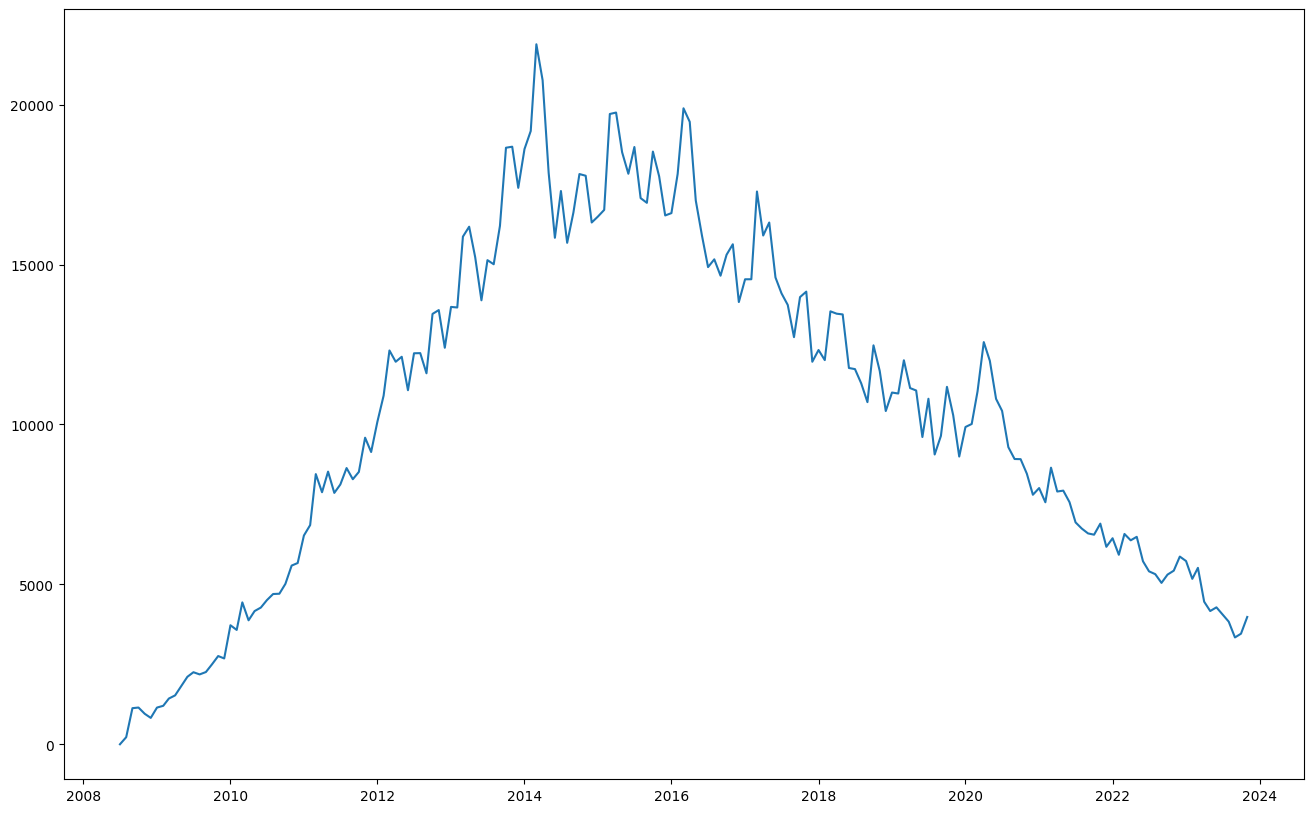

In [23]:
plt.figure(figsize=(16,10))
plt.plot(
    reshaped_df.index,
    reshaped_df.java
)

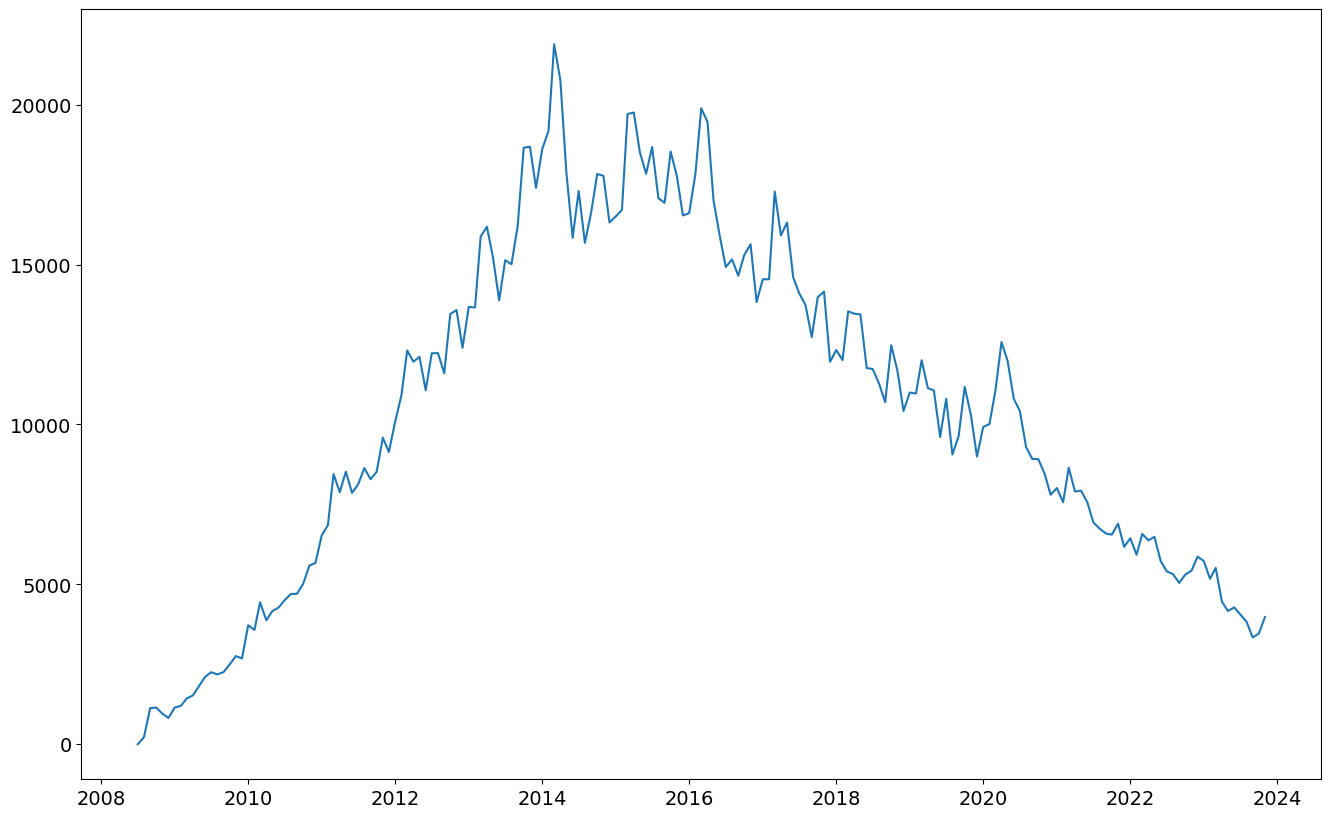

In [24]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(
    reshaped_df.index,
    reshaped_df.java
)

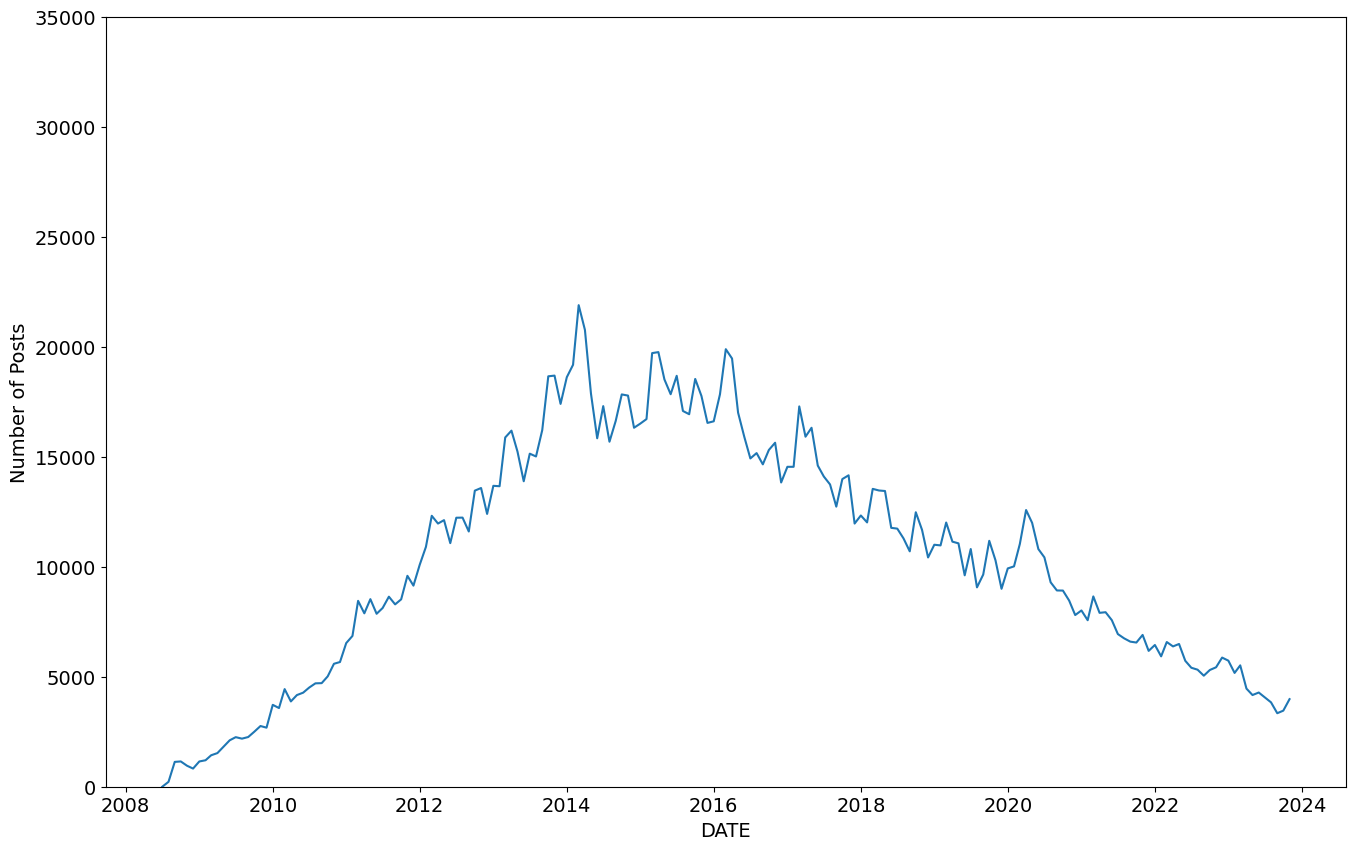

In [36]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("DATE", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0,35000)
plt.plot(
    reshaped_df.index,
    reshaped_df.java
)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

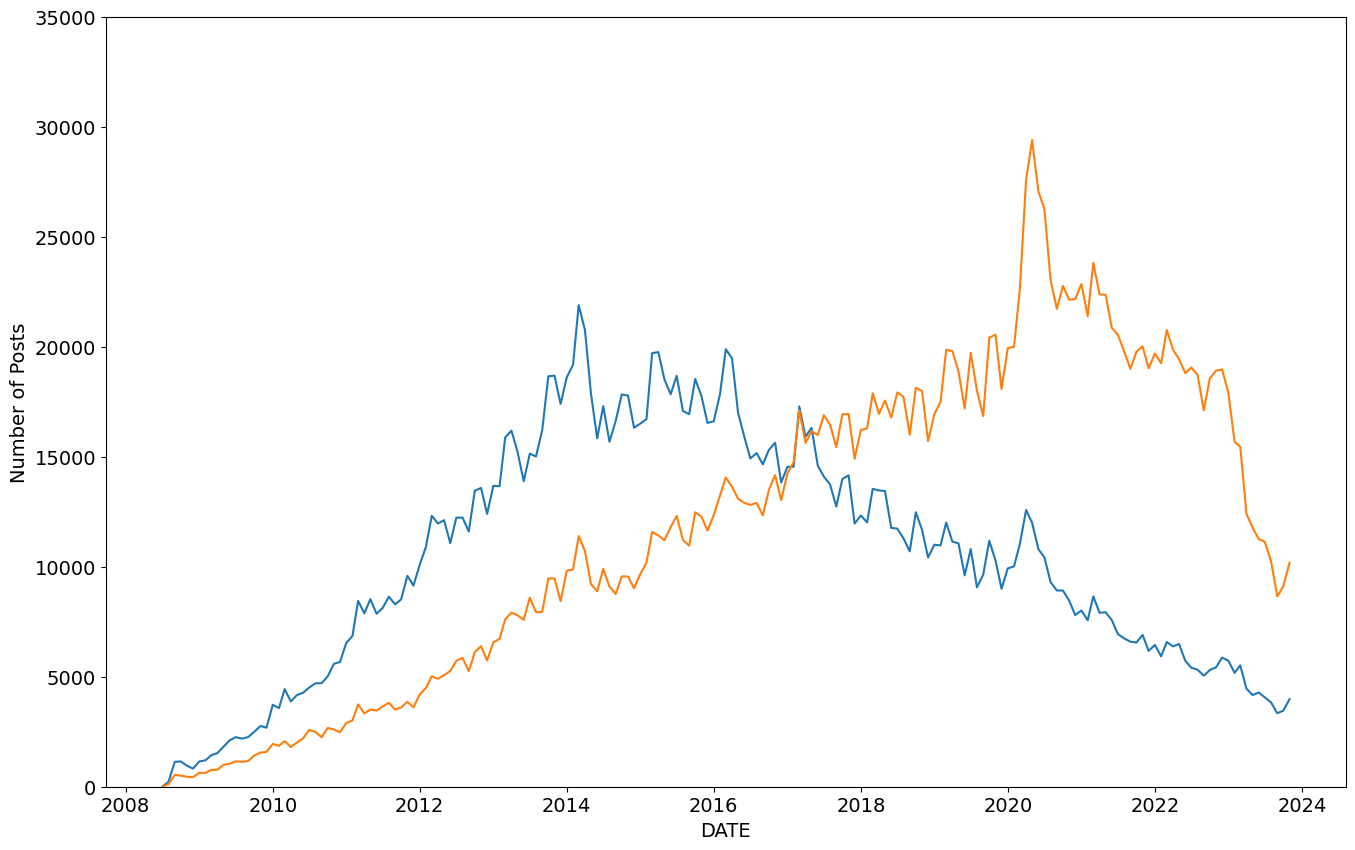

In [35]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("DATE", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0,35000)
plt.plot(
    reshaped_df.index,
    reshaped_df.java
)
plt.plot(
    reshaped_df.index,
    reshaped_df.python
)

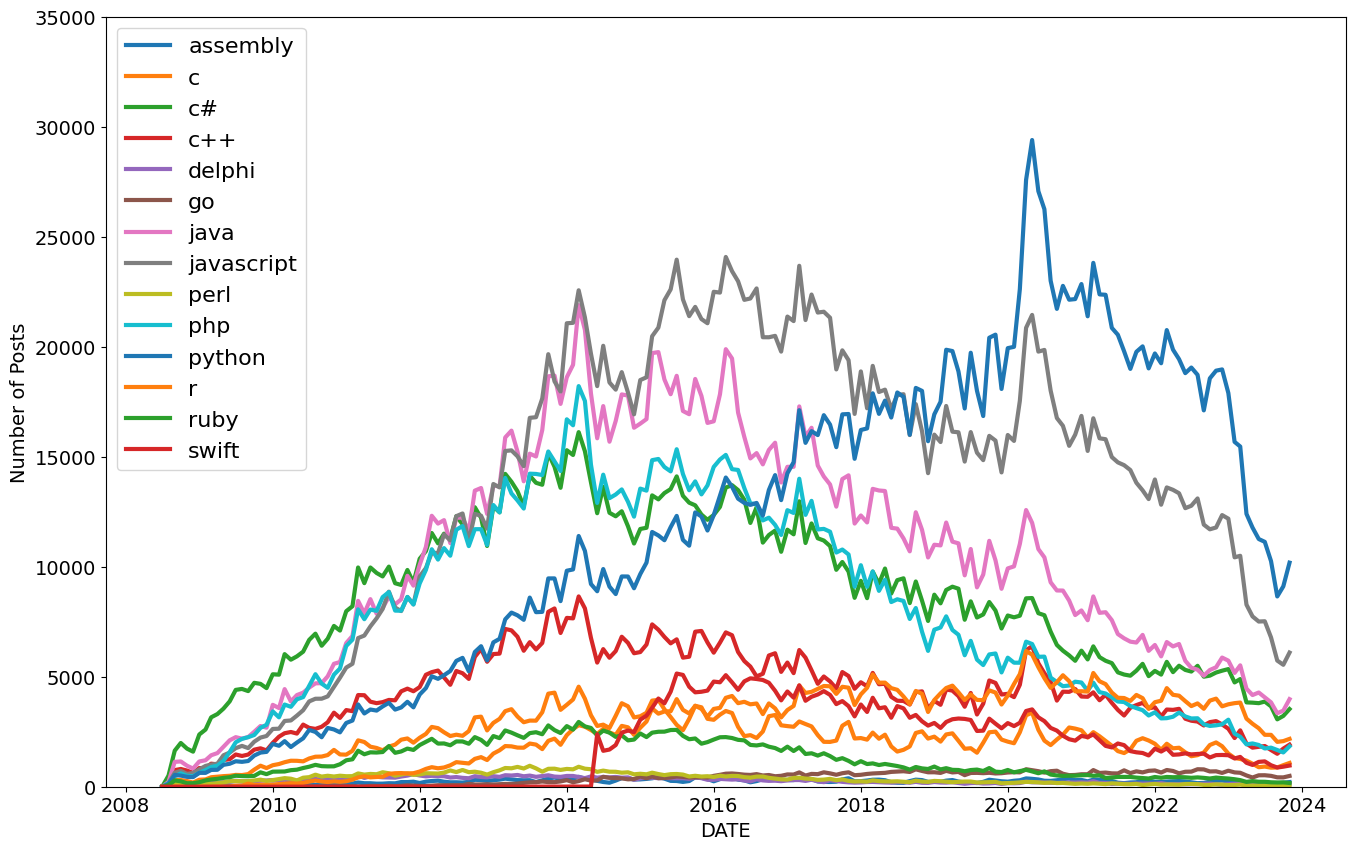

In [34]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("DATE", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0,35000)

for col in reshaped_df.columns:
    plt.plot(
        reshaped_df.index,
        reshaped_df[col],
        linewidth=3,
        label=reshaped_df[col].name
    )

plt.legend(fontsize=16)

Looks like Python is the most popular programming language judging by the number of posts on Stack Overflow! Python for the win 😊

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

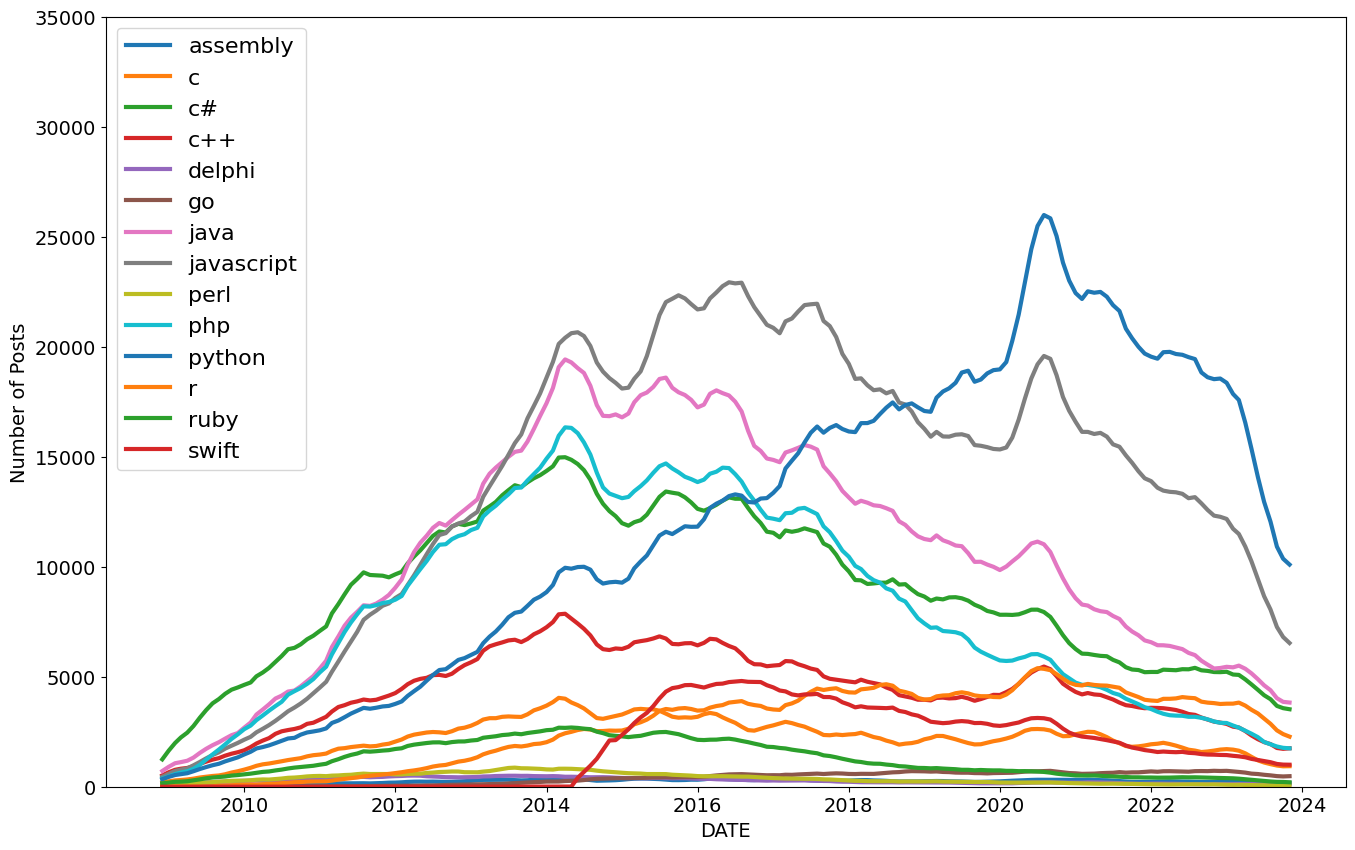

In [33]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("DATE", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0,35000)

for col in roll_df.columns:
    plt.plot(
        roll_df.index,
        roll_df[col],
        linewidth=3,
        label=roll_df[col].name
    )

plt.legend(fontsize=16)

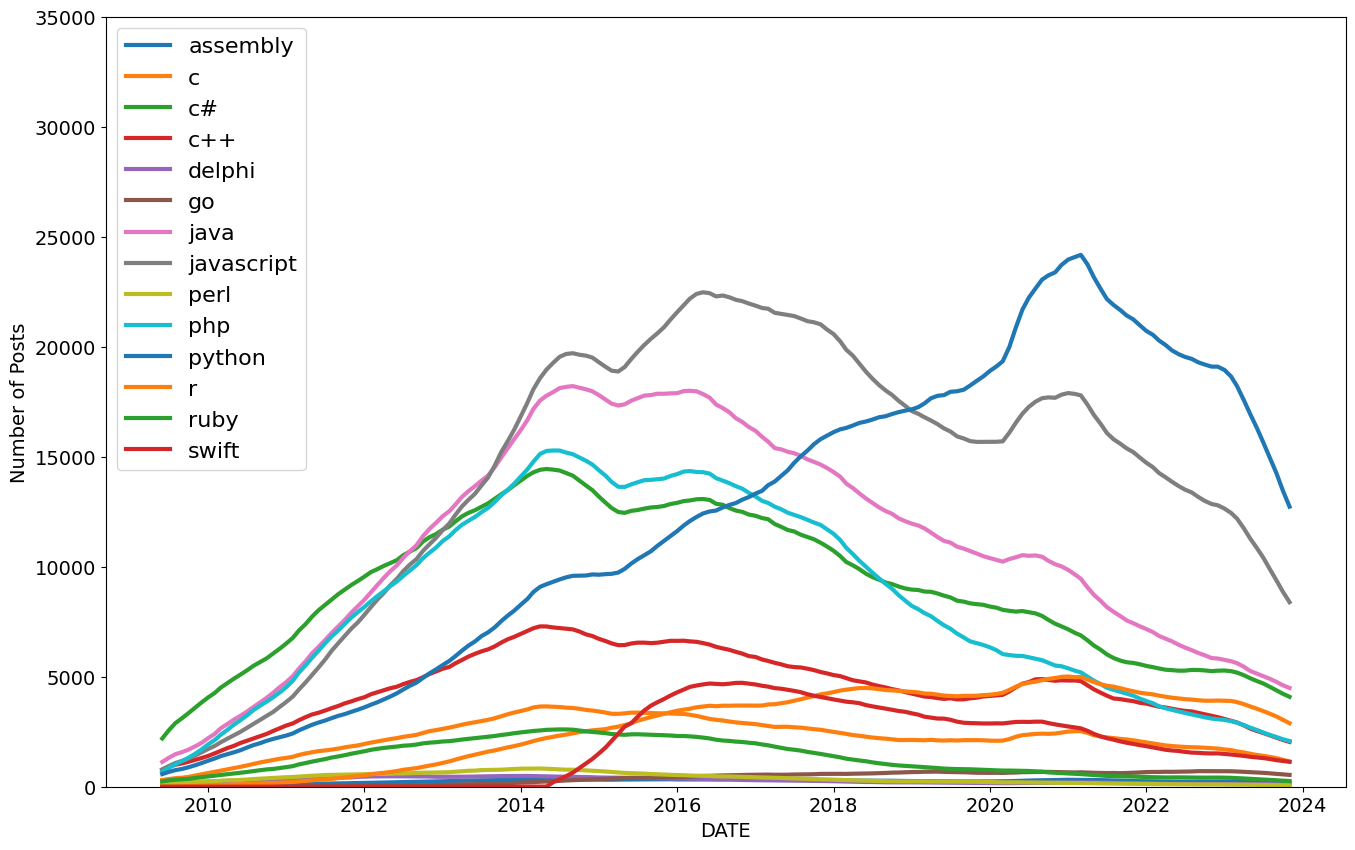

In [32]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=12).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("DATE", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0,35000)

for col in roll_df.columns:
    plt.plot(
        roll_df.index,
        roll_df[col],
        linewidth=3,
        label=roll_df[col].name
    )

plt.legend(fontsize=16)

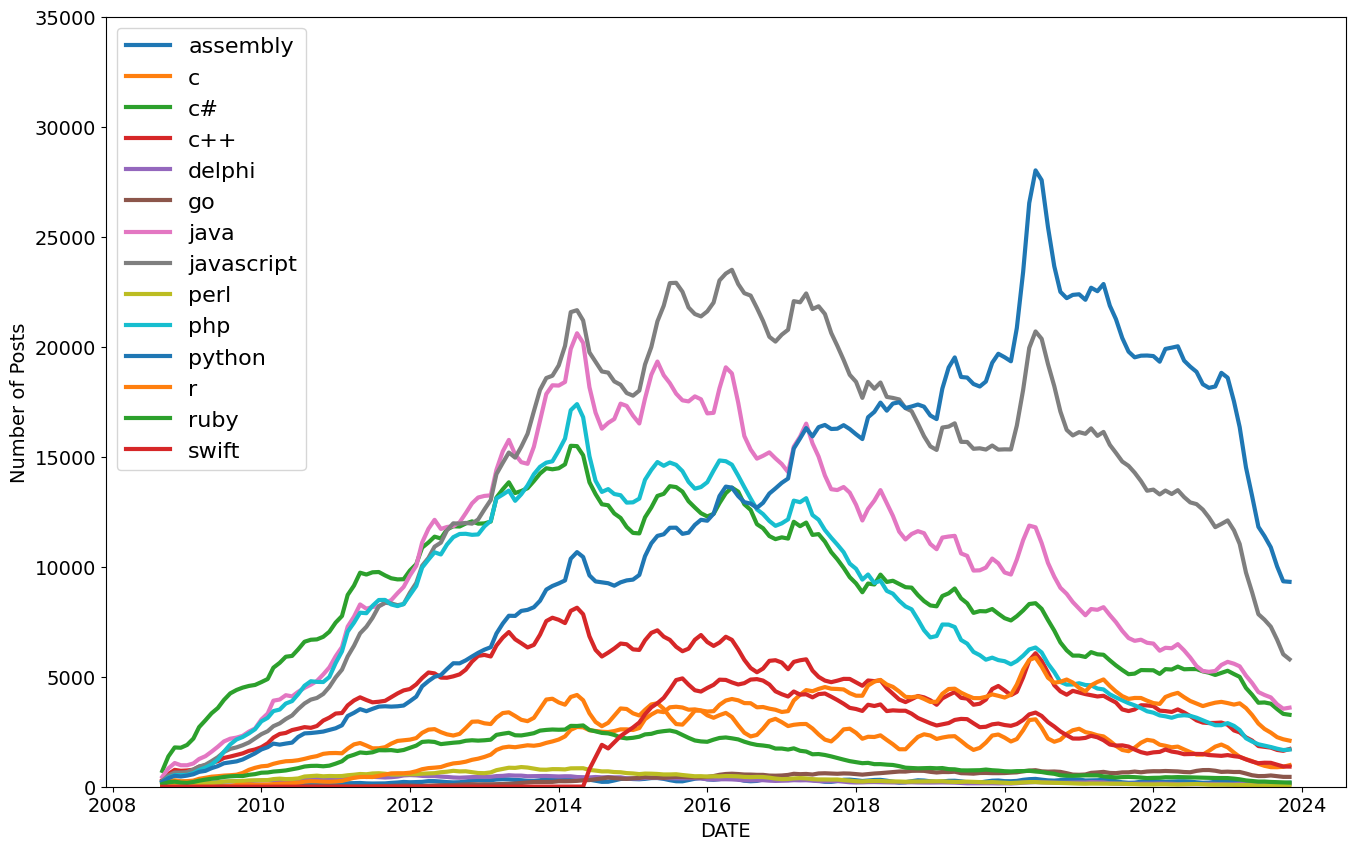

In [31]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=3).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("DATE", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0,35000)

for col in roll_df.columns:
    plt.plot(
        roll_df.index,
        roll_df[col],
        linewidth=3,
        label=roll_df[col].name
    )

plt.legend(fontsize=16)

---
### Quiz

#### Question 1:

Looking at the data, what was the most popular programming language from 2008 to 2012 by the number of posts?

* Python
* Javascript
* Assembly
* C#

**Answer**

C#


#### Question 2:

What was the most popular programming language from 2015 to 2018?

* Python
* Java
* Javascript
* PHP

**Answer**

Javascript


#### Question 3:

What was the most popular programming language in 2020?

* Javascript
* PYTHON
* Not Python

**Answer**

PYTHON

---
## Learning Points & Summary
Congratulations on completing another challenging data science project! Today we've seen how to grab some raw data and create some interesting charts using Pandas and Matplotlib. We've

* used `.groupby()` to explore the number of posts and entries per programming language

* converted strings to Datetime objects with `to_datetime()` for easier plotting

* reshaped our DataFrame by converting categories to columns using `.pivot()`

* used `.count()` and `isna().values.any()` to look for NaN values in our DataFrame, which we then replaced using `.fillna()`

* created (multiple) line charts using `.plot()` with a for-loop

* styled our charts by changing the size, the labels, and the upper and lower bounds of our axis.

* added a legend to tell apart which line is which by colour

* smoothed out our time-series observations with `.rolling().mean()` and plotted them to better identify trends over time.


<img src="https://img-c.udemycdn.com/redactor/raw/2020-10-10_09-46-41-09be133d8fa576738faffbacf0971882.jpg">

---